In [1]:
% Initialize MATLAB
clearvars
cd ../matlab 
pwd
format compact


ans =

    '/Users/eechris/code/src/github.com/cpjobling/eg-150-textbook/laplace_transform/matlab'



In [2]:
b = [1, 2, 3];    % s^2 + 2s + 3
a = [1, 4, 5, 6]; % s^3 + 4s^2 + 5s + 6

In [3]:
q = [1, 2, 0];
r = [1, 0, 2, 0, 1];

In [4]:
syms s

In [5]:
G(s) = (s^2 + 2*s + 3)/(s^3 + 4*s^2 + 5*s + 6)

G(s) =


(s^2 + 2*s + 3)/(s^3 + 4*s^2 + 5*s + 6)


In [6]:
[Num,Den] = numden(G(s))

Num =


s^2 + 2*s + 3


Den =


s^3 + 4*s^2 + 5*s + 6


In [7]:
nNum = sym2poly(Num), nDen = sym2poly(Den)

nNum =
     1     2     3


nDen =
     1     4     5     6


In [8]:
poly2sym(r,s)

ans =


s^4 + 2*s^2 + 1


In [9]:
z = [-1; -3];
p = [0; -2; -4];

In [10]:
K = 1;

In [11]:
G = zpk(z,p,K)


G =


   (s+1) (s+3)


  -------------


  s (s+2) (s+4)


Continuous-time zero/pole/gain model.



In [12]:
[num,den]=tfdata(G,'v')

num =
     0     1     4     3


den =
     1     6     8     0


In [13]:
G2=tf(num,den)


G2 =


    s^2 + 4 s + 3


  -----------------


  s^3 + 6 s^2 + 8 s


Continuous-time transfer function.



In [14]:
[zeros,poles,gain]=zpkdata(G2,'v')

zeros =
    -3
    -1


poles =
     0
    -4
    -2
gain =
     1


In [15]:
G2=tf(num,den)


G2 =


    s^2 + 4 s + 3


  -----------------
  s^3 + 6 s^2 + 8 s


Continuous-time transfer function.



In [16]:
[zeros,poles,gain]=zpkdata(G2,'v')

zeros =
    -3
    -1


poles =
     0
    -4
    -2


gain =
     1


In [17]:
set(G,'InputName','Voltage','OutputName','Angular Position')

In [18]:
G3=zpk(z,p,K,'InputName','Armature Voltage (V)',...
    'OutputName','Load Shaft Position (rad)',...
    'notes','An armature voltage controlled servomechanism')


G3 =


  From input "Armature Voltage (V)" to output "Load Shaft Position (rad)":


   (s+1) (s+3)


  -------------


  s (s+2) (s+4)


Continuous-time zero/pole/gain model.



In [19]:
get(G3,'notes')

ans =
  1x1 cell array
    {'An armature voltage controlled servomechanism'}


In [20]:
in=G3.InputName, out=G3.OutputName

in =
  1x1 cell array
    {'Armature Voltage (V)'}


out =
  1x1 cell array
    {'Load Shaft Position (rad)'}


In [21]:
get(G3)

                Z: {[2x1 double]}
                P: {[3x1 double]}
                K: 1
    DisplayFormat: 'roots'
         Variable: 's'
          IODelay: 0
       InputDelay: 0
      OutputDelay: 0
        InputName: {'Armature Voltage (V)'}
        InputUnit: {''}
       InputGroup: [1x1 struct]
       OutputName: {'Load Shaft Position (rad)'}
       OutputUnit: {''}
      OutputGroup: [1x1 struct]
            Notes: {'An armature voltage controlled servomechanism'}
         UserData: []
             Name: ''
               Ts: 0
         TimeUnit: 'seconds'
     SamplingGrid: [1x1 struct]


In [22]:
G4 = zpk(G2)


G4 =


   (s+3) (s+1)


  -------------


  s (s+4) (s+2)


Continuous-time zero/pole/gain model.



In [23]:
G5 = tf(G)


G5 =


  From input "Voltage" to output "Angular Position":


    s^2 + 4 s + 3


  -----------------


  s^3 + 6 s^2 + 8 s


Continuous-time transfer function.



In [24]:
syms s

In [25]:
R1 = 200*10^3; 
R2 = 40*10^3;
R3 = 50*10^3;

C1 = 25*10^(-9);
C2 = 10*10^(-9);

In [26]:
den = R1*((1/R1+ 1/R2 + 1/R3 + s*C1)*(s*R3*C2) + 1/R2)

den =


100*s*((7555786372591433*s)/302231454903657293676544 + 1/20000) + 5


In [27]:
format long
denG = sym2poly(den)

denG =
   0.000002500000000   0.005000000000000   5.000000000000000


In [28]:
numG = -1;

In [29]:
a = denG(1);
b = denG(2);

In [30]:
w = 1:10:10000;
Gw = -1./(a*w.^2 - j.*b.*w + denG(3));

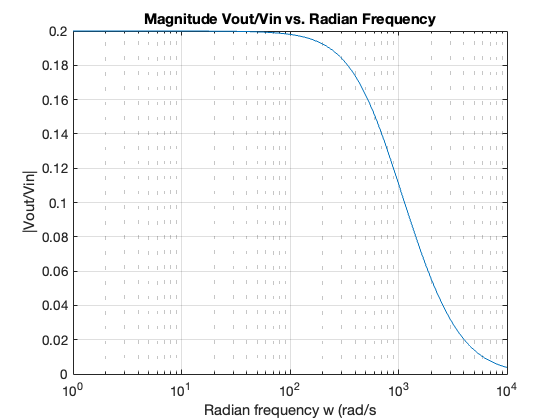

In [31]:
semilogx(w, abs(Gw))
xlabel('Radian frequency w (rad/s')
ylabel('|Vout/Vin|')
title('Magnitude Vout/Vin vs. Radian Frequency')
grid

In [32]:
G = tf([-1],[1 3 1])


G =


       -1


  -------------


  s^2 + 3 s + 1


Continuous-time transfer function.



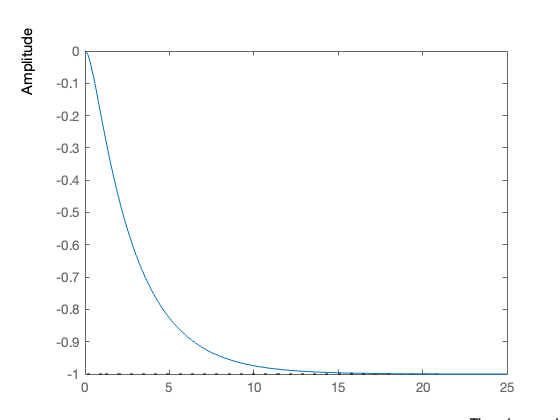

In [33]:
step(G)

In [34]:
open example_8

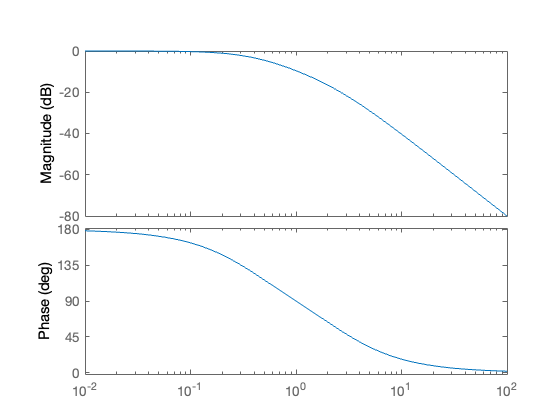

In [35]:
bode(G)

In [36]:
% Matlab setup
clear all
cd ../matlab 
pwd
format compact

ans =
    '/Users/eechris/code/src/github.com/cpjobling/eg-150-textbook/laplace_transform/matlab'


In [37]:
syms s;

In [38]:
R1 = 200*10^3; % 200 kOhm 
R2 = 40*10^3; % 40 kOhm
R3 = 50*10^3; % 50 kOhm

C1 = 25*10^(-9); % 25 nF
C2 = 10*10^(-9); % 10 nF

In [39]:
den = R1*((1/R1+ 1/R2 + 1/R3 + s*C1)*(s*R3*C2) + 1/R2);
simplify(den)

ans =


100*s*((7555786372591433*s)/302231454903657293676544 + 1/20000) + 5


In [40]:
format long
denG = sym2poly(ans)

denG =
   0.000002500000000   0.005000000000000   5.000000000000000


In [41]:
numG = -1;

In [42]:
a = denG(1);
b = denG(2);

In [43]:
w = 1:10:10000;

In [44]:
Gw = -1./(a*w.^2 - j.*b.*w + denG(3));

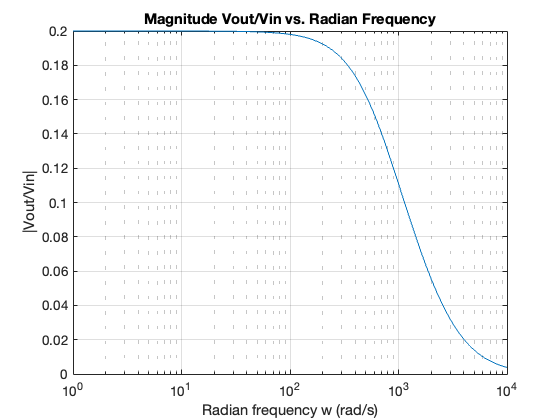

In [45]:
semilogx(w, abs(Gw))
xlabel('Radian frequency w (rad/s)')
ylabel('|Vout/Vin|')
title('Magnitude Vout/Vin vs. Radian Frequency')
grid

In [46]:
edit tf_matlab

In [47]:
G = tf([-1],[1 3 1])


G =


       -1


  -------------


  s^2 + 3 s + 1


Continuous-time transfer function.



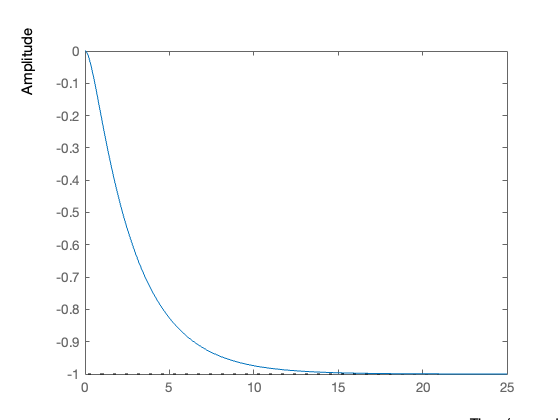

In [48]:
step(G)

In [49]:
open example_8

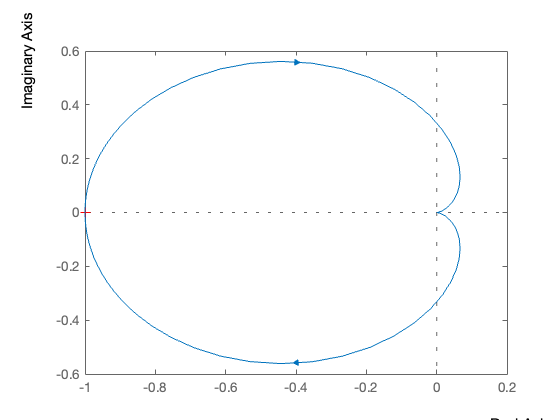

In [50]:
%bode(G)
nyquist(G)
%rlocus(G)

In [51]:
cd ../matlab
ls
open example_14_2

README.md        ex3_3.m          example_14_2.mlx solution5.m
convolution_demo ex3_4.m          example_8.slx    solution7.m
ex3_1.m          ex3_5.m          solution3.m      tf_matlab.m
ex3_2.m          example8.m       solution3.mlx    tf_matlab.mlx

